In [31]:
import pandas as pd

# File paths
csv_file = '/Users/marclambertes/Downloads/DB2425/Sample_Game_1_RawTrackingData_Away_Team.csv'  # Replace with your CSV file path
excel_file = 'AwayTrack.xlsx'  # Replace with your desired Excel file path

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Save the DataFrame to an Excel file
df.to_excel(excel_file, index=False)  # 'index=False' to exclude the index column

print(f"CSV file converted to Excel and saved at: {excel_file}")



/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_74275/1919423829.py:8: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


CSV file converted to Excel and saved at: AwayTrack.xlsx


In [32]:
import pandas as pd

# Step 1: Load the updated Excel file
excel_file = 'AwayTrack.xlsx'  # Replace with your actual file path
df = pd.read_excel(excel_file)

# Step 2: Rename columns as per the rule
new_columns = []
i = 0

while i < len(df.columns):
    col = df.columns[i]

    if col.startswith('Player'):  # If the column starts with "Player"
        # Rename the current column to include 'X'
        new_columns.append(f"{col}X")

        # Check if the next column is the empty column and rename it to include 'Y'
        if i + 1 < len(df.columns) and df.columns[i + 1] == " ":
            new_columns.append(f"{col}Y")
            i += 1  # Skip the next column since it's handled

    else:
        new_columns.append(col)  # Keep non-"Player" columns unchanged

    i += 1

# Step 3: Apply the new column names to the DataFrame
df.columns = new_columns

# Step 4: Save the updated DataFrame to a new Excel file
new_excel_file = 'Away.xlsx'  # Replace with your desired output path
df.to_excel(new_excel_file, index=False)

print(f"Columns renamed, and updated file saved to: {new_excel_file}")


Columns renamed, and updated file saved to: Away.xlsx


First few rows of the data:
   Period  Frame  Time [s]  Player11X  Player11X.1  Player1X  Player1Y  \
0       1      1      0.04    0.00082      0.48238   0.32648   0.65322   
1       1      2      0.08    0.00096      0.48238   0.32648   0.65322   
2       1      3      0.12    0.00114      0.48238   0.32648   0.65322   
3       1      4      0.16    0.00121      0.48238   0.32622   0.65317   
4       1      5      0.20    0.00129      0.48238   0.32597   0.65269   

   Player2X  Player2Y  Player3X  ...  Player10X  Player10Y  Player12X  \
0   0.33701   0.48863   0.30927  ...    0.55243    0.43269        NaN   
1   0.33701   0.48863   0.30927  ...    0.55243    0.43269        NaN   
2   0.33701   0.48863   0.30927  ...    0.55243    0.43269        NaN   
3   0.33687   0.48988   0.30944  ...    0.55236    0.43313        NaN   
4   0.33664   0.49018   0.30948  ...    0.55202    0.43311        NaN   

   Player12Y  Player13X  Player13Y  Player14X  Player14Y    BallX    BallY  
0        Na

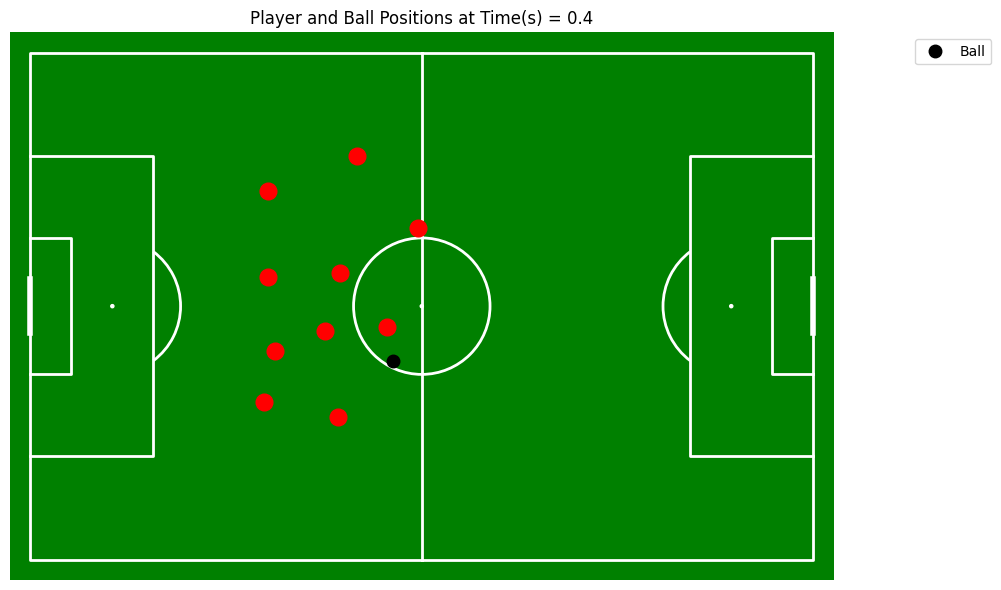

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Step 1: Load the updated Excel file
excel_file = 'Home.xlsx'  # Replace with your actual file path
df = pd.read_excel(excel_file)

# Clean column names by stripping any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Step 2: Inspect the data before filtering (for debugging purposes)
print("First few rows of the data:")
print(df.head())

# Step 3: Filter rows where Time(s) = 0.4
filtered_df = df[df['Time [s]'] == 5.8]

# Step 4: Extract Player1X, Player1Y, ..., Player11X, Player11Y columns
player_columns_x = [f'Player{i}X' for i in range(1, 12)]  # Player1X to Player11X
player_columns_y = [f'Player{i}Y' for i in range(1, 12)]  # Player1Y to Player11Y

# Debugging: print player columns
print(f"Player X columns: {player_columns_x}")
print(f"Player Y columns: {player_columns_y}")

# Get player positions for plotting
player_positions = []
for x_col, y_col in zip(player_columns_x, player_columns_y):
    if x_col in filtered_df and y_col in filtered_df:
        x = filtered_df[x_col].values[0]  # Get the X value
        y = filtered_df[y_col].values[0]  # Get the Y value
        # Check if the values are not NaN
        if pd.notna(x) and pd.notna(y):
            player_positions.append((x, y))
        else:
            print(f"Missing data for {x_col} or {y_col}")  # Debugging: print missing columns
    else:
        print(f"Missing data for {x_col} or {y_col}")  # Debugging: print missing columns

# Debugging: print player positions
print(f"Player positions: {player_positions}")

# Get ball position
ball_x = filtered_df['BallX'].values[0] if 'BallX' in filtered_df else None
ball_y = filtered_df['BallY'].values[0] if 'BallY' in filtered_df else None

# Debugging: print ball position
print(f"Ball position: ({ball_x}, {ball_y})")

# Step 5: Draw the football pitch using mplsoccer
pitch = Pitch(pitch_type='metricasports', pitch_length=105, pitch_width=68, pitch_color='green', line_color='white')  # Explicitly set pitch dimensions
fig, ax = pitch.draw(figsize=(10, 6))

# Step 6: Plot player positions
for i, (x, y) in enumerate(player_positions):
    ax.plot(x, y, 'o', color='red', markersize=12)  # Larger red dots for players

# Plot the ball (football dot, distinct style)
if ball_x is not None and ball_y is not None:
    ax.plot(ball_x, ball_y, 'o', color='black', markersize=9, label="Ball")  # Black dot for the ball

# Add legend and display
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title("Player and Ball Positions at Time(s) = 0.4")
plt.show()


First few rows of the home data:
   Period  Frame  Time [s]  Player11X  Player11X.1  Player1X  Player1Y  \
0       1      1      0.04    0.00082      0.48238   0.32648   0.65322   
1       1      2      0.08    0.00096      0.48238   0.32648   0.65322   
2       1      3      0.12    0.00114      0.48238   0.32648   0.65322   
3       1      4      0.16    0.00121      0.48238   0.32622   0.65317   
4       1      5      0.20    0.00129      0.48238   0.32597   0.65269   

   Player2X  Player2Y  Player3X  ...  Player10X  Player10Y  Player12X  \
0   0.33701   0.48863   0.30927  ...    0.55243    0.43269        NaN   
1   0.33701   0.48863   0.30927  ...    0.55243    0.43269        NaN   
2   0.33701   0.48863   0.30927  ...    0.55243    0.43269        NaN   
3   0.33687   0.48988   0.30944  ...    0.55236    0.43313        NaN   
4   0.33664   0.49018   0.30948  ...    0.55202    0.43311        NaN   

   Player12Y  Player13X  Player13Y  Player14X  Player14Y    BallX    BallY  
0     

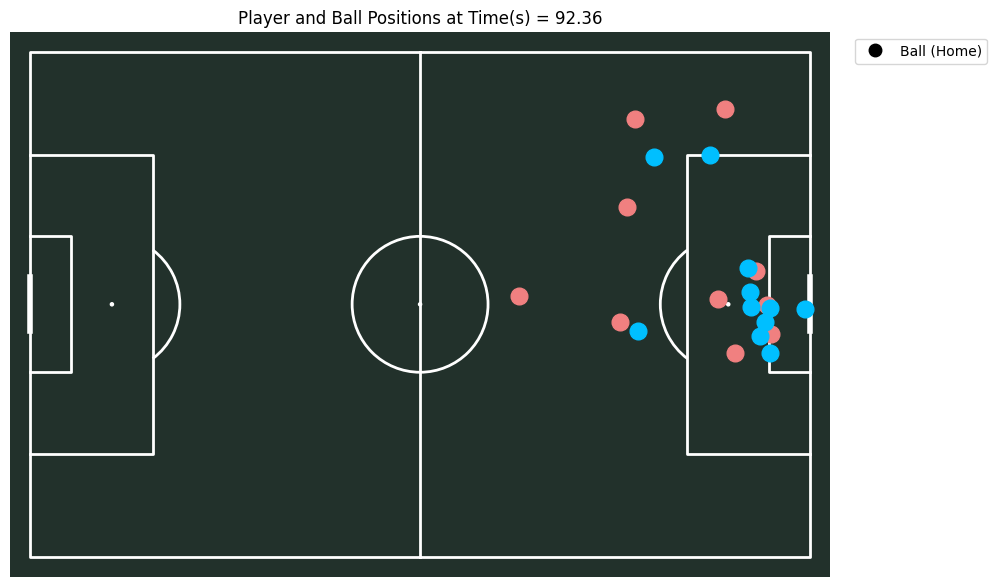

Plot saved as match_positions_92.36.png


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Step 1: Load the updated Excel files
home_excel_file = 'Home.xlsx'  # Replace with your actual file path
away_excel_file = 'Away.xlsx'  # Replace with your actual file path

# Load home and away data
df_home = pd.read_excel(home_excel_file)
df_away = pd.read_excel(away_excel_file)

# Clean column names by stripping any leading/trailing whitespace
df_home.columns = df_home.columns.str.strip()
df_away.columns = df_away.columns.str.strip()

# Step 2: Inspect the data before filtering (for debugging purposes)
print("First few rows of the home data:")
print(df_home.head())
print("First few rows of the away data:")
print(df_away.head())

# Step 3: Filter rows where Time(s) = 85.72
filtered_df_home = df_home[df_home['Time [s]'] == 92.36]
filtered_df_away = df_away[df_away['Time [s]'] == 92.36]

# Step 4: Extract Player1X, Player1Y, ..., Player11X, Player11Y columns for both home and away teams
player_columns_x_home = [f'Player{i}X' for i in range(1, 12)]  # Player1X to Player11X for home
player_columns_y_home = [f'Player{i}Y' for i in range(1, 12)]  # Player1Y to Player11Y for home
player_columns_x_away = [f'Player{i}X' for i in range(15, 26)]  # Player1X to Player11X for away
player_columns_y_away = [f'Player{i}Y' for i in range(15, 26)]  # Player1Y to Player11Y for away

# Debugging: print player columns for both teams
print(f"Home Player X columns: {player_columns_x_home}")
print(f"Home Player Y columns: {player_columns_y_home}")
print(f"Away Player X columns: {player_columns_x_away}")
print(f"Away Player Y columns: {player_columns_y_away}")

# Get player positions for the home team
player_positions_home = []
for x_col, y_col in zip(player_columns_x_home, player_columns_y_home):
    if x_col in filtered_df_home and y_col in filtered_df_home:
        x = filtered_df_home[x_col].values[0]
        y = filtered_df_home[y_col].values[0]
        if pd.notna(x) and pd.notna(y):
            player_positions_home.append((x, y))
        else:
            print(f"Missing data for {x_col} or {y_col} in home data")
    else:
        print(f"Missing data for {x_col} or {y_col} in home data")

# Get player positions for the away team
player_positions_away = []
for x_col, y_col in zip(player_columns_x_away, player_columns_y_away):
    if x_col in filtered_df_away and y_col in filtered_df_away:
        x = filtered_df_away[x_col].values[0]
        y = filtered_df_away[y_col].values[0]
        if pd.notna(x) and pd.notna(y):
            player_positions_away.append((x, y))
        else:
            print(f"Missing data for {x_col} or {y_col} in away data")
    else:
        print(f"Missing data for {x_col} or {y_col} in away data")

# Get ball position
ball_x_home = filtered_df_home['BallX'].values[0] if 'BallX' in filtered_df_home else None
ball_y_home = filtered_df_home['BallY'].values[0] if 'BallY' in filtered_df_home else None
ball_x_away = filtered_df_away['BallX'].values[0] if 'BallX' in filtered_df_away else None
ball_y_away = filtered_df_away['BallY'].values[0] if 'BallY' in filtered_df_away else None

# Step 5: Draw the football pitch using mplsoccer
pitch = Pitch(pitch_type='metricasports', pitch_length=105, pitch_width=68, pitch_color='#22312b', line_color='white')  # Explicitly set pitch dimensions
fig, ax = pitch.draw(figsize=(10, 6))

# Step 6: Plot home team player positions (lighter red dots)
for i, (x, y) in enumerate(player_positions_home):
    ax.plot(x, y, 'o', color='lightcoral', markersize=12)  # Light red dots for home team players

# Plot away team player positions (lighter blue dots)
for i, (x, y) in enumerate(player_positions_away):
    ax.plot(x, y, 'o', color='deepskyblue', markersize=12)  # Light blue dots for away team players

# Plot the ball (football dot, distinct style)
if ball_x_home is not None and ball_y_home is not None:
    ax.plot(ball_x_home, ball_y_home, 'o', color='black', markersize=9, label="Ball (Home)")  # Black dot for the home team's ball

if ball_x_away is not None and ball_y_away is not None:
    ax.plot(ball_x_away, ball_y_away, 'o', color='black', markersize=9, label="Ball (Away)")  # Black dot for the away team's ball

# Add legend and display
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title("Player and Ball Positions at Time(s) = 92.36")

# Save the plot as a PNG
output_filename = 'match_positions_92.36.png'
plt.savefig(output_filename)

# Display the plot
plt.show()

print(f"Plot saved as {output_filename}")


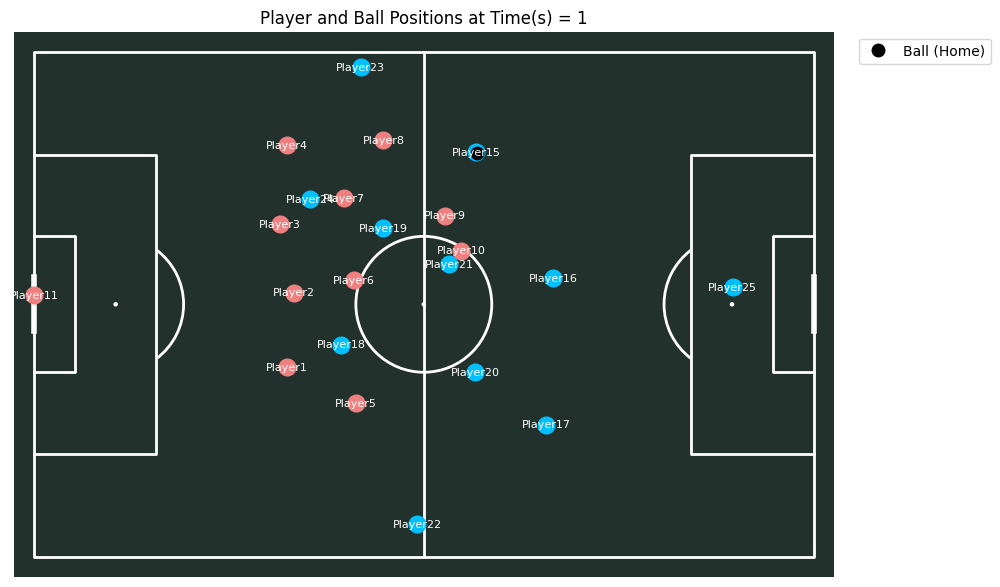

Plot saved as match_positions_1.png


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Step 1: Load the updated Excel files
home_excel_file = 'Home.xlsx'  # Replace with your actual file path
away_excel_file = 'Away.xlsx'  # Replace with your actual file path

# Load home and away data
df_home = pd.read_excel(home_excel_file)
df_away = pd.read_excel(away_excel_file)

# Clean column names by stripping any leading/trailing whitespace
df_home.columns = df_home.columns.str.strip()
df_away.columns = df_away.columns.str.strip()

# Step 2: Filter rows where Time(s) = 92.36
filtered_df_home = df_home[df_home['Time [s]'] == 1]
filtered_df_away = df_away[df_away['Time [s]'] == 1]

# Step 3: Extract Player1X, Player1Y, ..., Player11X, Player11Y columns for both home and away teams
player_columns_x_home = [f'Player{i}X' for i in range(1, 12)]  # Player1X to Player11X for home
player_columns_y_home = [f'Player{i}Y' for i in range(1, 12)]  # Player1Y to Player11Y for home
player_columns_x_away = [f'Player{i}X' for i in range(15, 26)]  # Player15X to Player25X for away
player_columns_y_away = [f'Player{i}Y' for i in range(15, 26)]  # Player15Y to Player25Y for away

# Get player positions for the home team
player_positions_home = []
for x_col, y_col in zip(player_columns_x_home, player_columns_y_home):
    if x_col in filtered_df_home and y_col in filtered_df_home:
        x = filtered_df_home[x_col].values[0]
        y = filtered_df_home[y_col].values[0]
        if pd.notna(x) and pd.notna(y):
            player_positions_home.append((x, y))
        else:
            print(f"Missing data for {x_col} or {y_col} in home data")
    else:
        print(f"Missing data for {x_col} or {y_col} in home data")

# Get player positions for the away team
player_positions_away = []
for x_col, y_col in zip(player_columns_x_away, player_columns_y_away):
    if x_col in filtered_df_away and y_col in filtered_df_away:
        x = filtered_df_away[x_col].values[0]
        y = filtered_df_away[y_col].values[0]
        if pd.notna(x) and pd.notna(y):
            player_positions_away.append((x, y))
        else:
            print(f"Missing data for {x_col} or {y_col} in away data")
    else:
        print(f"Missing data for {x_col} or {y_col} in away data")

# Get ball position
ball_x_home = filtered_df_home['BallX'].values[0] if 'BallX' in filtered_df_home else None
ball_y_home = filtered_df_home['BallY'].values[0] if 'BallY' in filtered_df_home else None
ball_x_away = filtered_df_away['BallX'].values[0] if 'BallX' in filtered_df_away else None
ball_y_away = filtered_df_away['BallY'].values[0] if 'BallY' in filtered_df_away else None

# Step 4: Draw the football pitch using mplsoccer
pitch = Pitch(pitch_type='metricasports', pitch_length=105, pitch_width=68, pitch_color='#22312b', line_color='white')  # Explicitly set pitch dimensions
fig, ax = pitch.draw(figsize=(10, 6))

# Step 5: Plot home team player positions (lighter red dots with labels)
for i, (x, y) in enumerate(player_positions_home):
    ax.plot(x, y, 'o', color='lightcoral', markersize=12)  # Light red dots for home team players
    ax.annotate(f"Player{i+1}", (x, y), color='white', fontsize=8, ha='center', va='center')  # Label players

# Plot away team player positions (lighter blue dots with labels)
for i, (x, y) in enumerate(player_positions_away):
    ax.plot(x, y, 'o', color='deepskyblue', markersize=12)  # Light blue dots for away team players
    ax.annotate(f"Player{i+15}", (x, y), color='white', fontsize=8, ha='center', va='center')  # Label players

# Plot the ball (football dot, distinct style)
if ball_x_home is not None and ball_y_home is not None:
    ax.plot(ball_x_home, ball_y_home, 'o', color='black', markersize=9, label="Ball (Home)")  # Black dot for the home team's ball

if ball_x_away is not None and ball_y_away is not None:
    ax.plot(ball_x_away, ball_y_away, 'o', color='black', markersize=9, label="Ball (Away)")  # Black dot for the away team's ball

# Add legend and display
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.title("Player and Ball Positions at Time(s) = 1")

# Save the plot as a PNG
output_filename = 'match_positions_1.png'
plt.savefig(output_filename)

# Display the plot
plt.show()

print(f"Plot saved as {output_filename}")


In [53]:
import pandas as pd
import numpy as np

# Load the Excel files
home_excel_file = 'Home.xlsx'  # Replace with your file path
away_excel_file = 'Away.xlsx'  # Replace with your file path

# Load home and away data
df_home = pd.read_excel(home_excel_file)
df_away = pd.read_excel(away_excel_file)

# Clean column names
df_home.columns = df_home.columns.str.strip()
df_away.columns = df_away.columns.str.strip()

# Merge dataframes on the time column to align timestamps
merged_df = pd.merge(df_home, df_away, on='Time [s]', suffixes=('_home', '_away'))

# Identify ball position
ball_x = merged_df['BallX']
ball_y = merged_df['BallY']

# Calculate distances of the ball to all players
home_distances = []
away_distances = []

for i in range(1, 12):  # Player1 to Player11 for home team
    home_distances.append(np.sqrt((merged_df[f'Player{i}X'] - ball_x)**2 + (merged_df[f'Player{i}Y'] - ball_y)**2))

for i in range(15, 26):  # Player15 to Player25 for away team
    away_distances.append(np.sqrt((merged_df[f'Player{i}X'] - ball_x)**2 + (merged_df[f'Player{i}Y'] - ball_y)**2))

# Find the closest home and away players to the ball
min_home_distance = np.min(home_distances, axis=0)
min_away_distance = np.min(away_distances, axis=0)

# Determine possession
merged_df['Possession'] = np.where(min_home_distance < min_away_distance, 'Home', 'Away')

# Filter rows where the home team has possession
home_possession_df = merged_df[merged_df['Possession'] == 'Home']

# Extract positions of Player6 (home) and Player24 (away)
player6_x = home_possession_df['Player6X']
player6_y = home_possession_df['Player6Y']
player24_x = home_possession_df['Player24X']
player24_y = home_possession_df['Player24Y']

# Calculate the Euclidean distance
distances = np.sqrt((player24_x - player6_x)**2 + (player24_y - player6_y)**2)

# Filter for distances <= 2 meters
close_proximity_df = home_possession_df[distances <= 2]

# Calculate the total time within 2 meters
# Assuming timestamps are uniformly spaced; adjust if timestamps are irregular
time_step = merged_df['Time [s]'].iloc[1] - merged_df['Time [s]'].iloc[0]
time_within_proximity = len(close_proximity_df) * time_step

# Calculate the total playtime for Player 24 (non-NaN entries for Player24X and Player24Y)
player24_playtime = len(merged_df.dropna(subset=['Player24X', 'Player24Y'])) * time_step

# Calculate the ratio of time within proximity to total playtime
if player24_playtime > 0:
    proximity_ratio = time_within_proximity / player24_playtime
else:
    proximity_ratio = 0

# Output the results
print(f"Player 24 spent {time_within_proximity:.2f} seconds within 2 meters of Player 6 when the home team had the ball.")
print(f"Player 24 played a total of {player24_playtime:.2f} seconds in the game.")
print(f"The ratio of time within proximity to total playtime is {proximity_ratio:.2%}.")


Player 24 spent 437.84 seconds within 2 meters of Player 6 when the home team had the ball.
Player 24 played a total of 4263.96 seconds in the game.
The ratio of time within proximity to total playtime is 10.27%.


In [63]:
import pandas as pd
import numpy as np

# Load the Excel files
home_excel_file = 'Home.xlsx'  # Replace with your file path
away_excel_file = 'Away.xlsx'  # Replace with your file path

# Load home and away data
df_home = pd.read_excel(home_excel_file)
df_away = pd.read_excel(away_excel_file)

# Clean column names
df_home.columns = df_home.columns.str.strip()
df_away.columns = df_away.columns.str.strip()

# Merge dataframes on the time column to align timestamps
merged_df = pd.merge(df_home, df_away, on='Time [s]', suffixes=('_home', '_away'))

# Scale coordinates by multiplying by 100
for col in merged_df.columns:
    if 'X' in col or 'Y' in col:
        merged_df[col] *= 100

# Extract ball position
ball_x = merged_df['BallX']
ball_y = merged_df['BallY']

# Calculate distances of the ball to all players
home_distances = []
away_distances = []

for i in range(1, 12):  # Player1 to Player11 for home team
    home_distances.append(np.sqrt((merged_df[f'Player{i}X'] - ball_x)**2 + (merged_df[f'Player{i}Y'] - ball_y)**2))

for i in range(15, 26):  # Player15 to Player25 for away team
    away_distances.append(np.sqrt((merged_df[f'Player{i}X'] - ball_x)**2 + (merged_df[f'Player{i}Y'] - ball_y)**2))

# Find the closest home and away players to the ball
min_home_distance = np.min(home_distances, axis=0)
min_away_distance = np.min(away_distances, axis=0)

# Determine possession
merged_df['Possession'] = np.where(min_home_distance < min_away_distance, 'Home', 'Away')

# Filter rows where the home team has possession
home_possession_df = merged_df[merged_df['Possession'] == 'Home']

# Initialize results dictionary for home players (1-11)
results = []

# Loop through home players (1 to 11) and calculate attention drawn by the away players
for home_player_id in range(1, 12):
    home_player_x = home_possession_df[f'Player{home_player_id}X']
    home_player_y = home_possession_df[f'Player{home_player_id}Y']
    
    total_time_within_proximity = 0  # To accumulate the time within proximity for the home player
    attention_drawn = {}  # To store attention drawn by each away player
    
    # Loop through away players (15 to 25) and calculate proximity
    for away_player_id in range(15, 26):
        away_player_x = home_possession_df[f'Player{away_player_id}X']
        away_player_y = home_possession_df[f'Player{away_player_id}Y']
        
        # Calculate the Euclidean distance between the home player and the away player
        distances = np.sqrt((away_player_x - home_player_x)**2 + (away_player_y - home_player_y)**2)
        
        # Filter for distances <= 3 meters (scaled to 3 meters)
        close_proximity_mask = distances <= 3  # Already in meters after scaling
        
        # Calculate the time within proximity for this player
        time_step = home_possession_df['Time [s]'].diff().mean()  # Calculate the average time step
        time_within_proximity = close_proximity_mask.sum() * time_step  # Count rows and multiply by time step
        
        # Accumulate total time within proximity and attention drawn by the away player
        total_time_within_proximity += time_within_proximity
        attention_drawn[away_player_id] = time_within_proximity  # Store the attention drawn by this away player
    
    # Calculate the total playtime for the home player
    home_player_playtime = len(home_possession_df.dropna(subset=[f'Player{home_player_id}X', f'Player{home_player_id}Y'])) * time_step
    
    # Calculate the proximity ratio for the home player
    proximity_ratio = total_time_within_proximity / home_player_playtime if home_player_playtime > 0 else 0
    
    # Store the results for the home player
    results.append({
        'Player': f'Player{home_player_id}',
        'Total Time Within Proximity (s)': total_time_within_proximity,
        'Total Playtime (s)': home_player_playtime,
        'Proximity Ratio (%)': proximity_ratio * 100,
        'Attention Drawn by Away Players (s)': attention_drawn
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Save the results DataFrame to an Excel file
output_excel_file = 'Home_Player_Proximity_Sum_Results_With_Attention.xlsx'
results_df.to_excel(output_excel_file, index=False)

# Display the results
print(results_df)
print(f"Results saved to {output_excel_file}")


      Player  Total Time Within Proximity (s)  Total Playtime (s)  \
0    Player1                       404.043700         1861.929838   
1    Player2                       328.465959         1861.929838   
2    Player3                       400.816785         1861.929838   
3    Player4                       111.583317         1861.929838   
4    Player5                       271.230681         1861.929838   
5    Player6                       214.504915         1861.929838   
6    Player7                       228.771275         1861.929838   
7    Player8                       290.082656         1861.929838   
8    Player9                       666.442824         1861.929838   
9   Player10                       353.262251         1861.929838   
10  Player11                         7.812531         1861.929838   

    Proximity Ratio (%)                Attention Drawn by Away Players (s)  
0             21.700265  {15: 7.642692939244664, 16: 30.061258894362343...  
1             17.

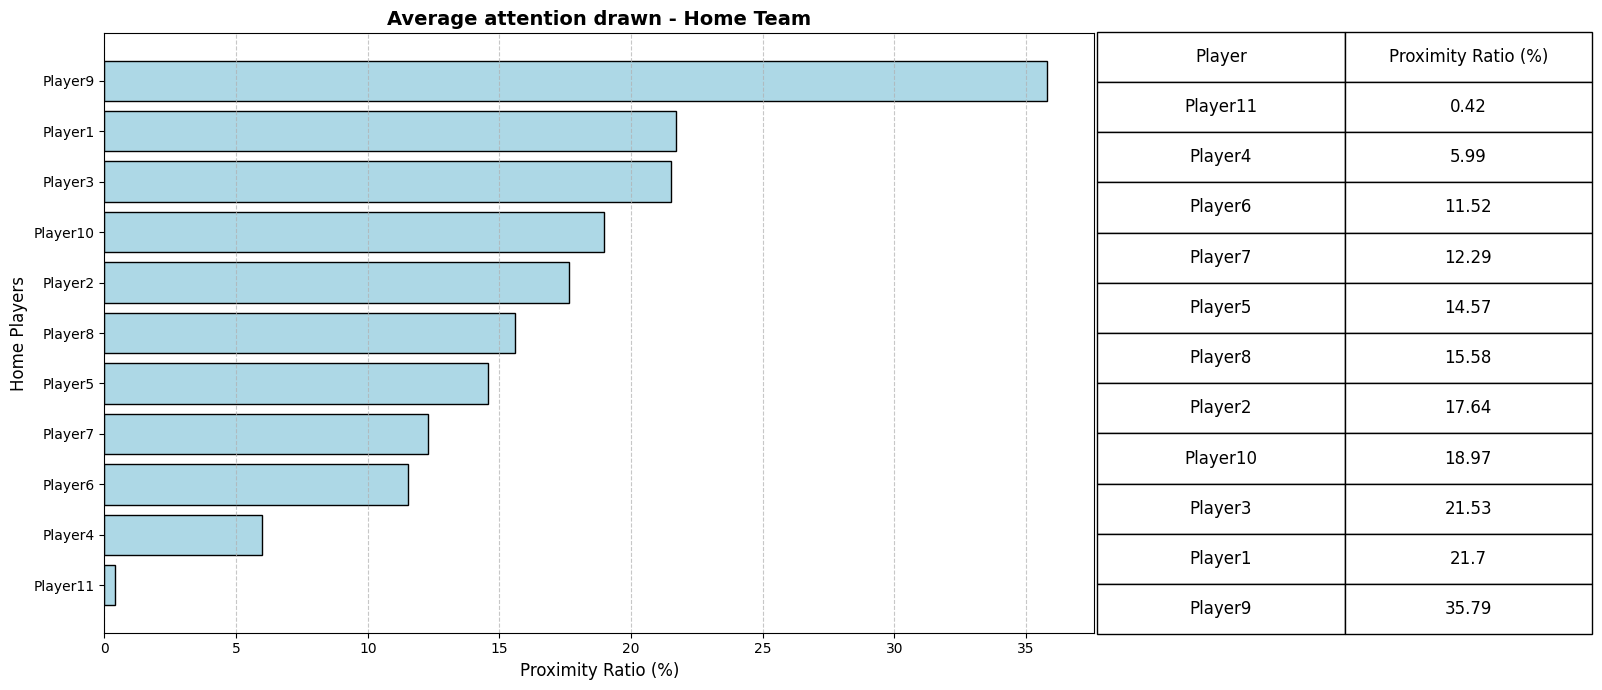

In [83]:
import matplotlib.pyplot as plt

# Sort the results dataframe by 'Proximity Ratio (%)' in ascending order
sorted_df = results_df.sort_values('Proximity Ratio (%)', ascending=True)

# Create subplots: one for the bar graph and one for the table
fig, ax = plt.subplots(figsize=(16, 7), ncols=2, gridspec_kw={'width_ratios': [3, 1]})

# Create a horizontal bar graph visualization for Proximity Ratio
ax[0].barh(sorted_df['Player'], sorted_df['Proximity Ratio (%)'], color='lightblue', edgecolor='black')

# Title and labels for the bar graph
ax[0].set_title('Average attention drawn - Home Team', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Home Players', fontsize=12)
ax[0].set_xlabel('Proximity Ratio (%)', fontsize=12)

# Adjust the ticks on y-axis to make them readable
ax[0].tick_params(axis='y', labelsize=10)

# Add gridlines for better readability
ax[0].grid(True, axis='x', linestyle='--', alpha=0.7)

# Create a table next to the bar graph
table_data = sorted_df[['Player', 'Proximity Ratio (%)']].round(2)  # Optional rounding for clarity
table = ax[1].table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')

# Increase the font size and adjust the table's size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 2.71)  # Scale the table size

# Hide the axes for the table subplot
ax[1].axis('off')

# Show the combined plot with tight layout for better spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('bar_and_table_plot.png', dpi=300)

# Display the plot
plt.show()


In [84]:
# Initialize results dictionary for away players (15-25)
away_results = []

# Loop through away players (15 to 25) and calculate attention drawn by the home players
for away_player_id in range(15, 26):
    away_player_x = home_possession_df[f'Player{away_player_id}X']
    away_player_y = home_possession_df[f'Player{away_player_id}Y']
    
    total_time_within_proximity = 0  # To accumulate the time within proximity for the away player
    attention_drawn = {}  # To store attention drawn by each home player
    
    # Loop through home players (1 to 11) and calculate proximity
    for home_player_id in range(1, 12):
        home_player_x = home_possession_df[f'Player{home_player_id}X']
        home_player_y = home_possession_df[f'Player{home_player_id}Y']
        
        # Calculate the Euclidean distance between the away player and the home player
        distances = np.sqrt((away_player_x - home_player_x)**2 + (away_player_y - home_player_y)**2)
        
        # Filter for distances <= 3 meters (scaled to 3 meters)
        close_proximity_mask = distances <= 3  # Already in meters after scaling
        
        # Calculate the time within proximity for this player
        time_step = home_possession_df['Time [s]'].diff().mean()  # Calculate the average time step
        time_within_proximity = close_proximity_mask.sum() * time_step  # Count rows and multiply by time step
        
        # Accumulate total time within proximity and attention drawn by the home player
        total_time_within_proximity += time_within_proximity
        attention_drawn[home_player_id] = time_within_proximity  # Store the attention drawn by this home player
    
    # Calculate the total playtime for the away player
    away_player_playtime = len(home_possession_df.dropna(subset=[f'Player{away_player_id}X', f'Player{away_player_id}Y'])) * time_step
    
    # Calculate the proximity ratio for the away player
    proximity_ratio = total_time_within_proximity / away_player_playtime if away_player_playtime > 0 else 0
    
    # Store the results for the away player
    away_results.append({
        'Player': f'Player{away_player_id}',
        'Total Time Within Proximity (s)': total_time_within_proximity,
        'Total Playtime (s)': away_player_playtime,
        'Proximity Ratio (%)': proximity_ratio * 100,
        'Attention Drawn by Home Players (s)': attention_drawn
    })

# Convert results for the away team to a DataFrame for better visualization
away_results_df = pd.DataFrame(away_results)

# Save the results DataFrame to an Excel file
output_away_excel_file = 'Away_Player_Proximity_Sum_Results_With_Attention.xlsx'
away_results_df.to_excel(output_away_excel_file, index=False)

# Display the results
print(away_results_df)
print(f"Results saved to {output_away_excel_file}")


      Player  Total Time Within Proximity (s)  Total Playtime (s)  \
0   Player15                       258.323021         1861.929838   
1   Player16                       288.893793         1861.929838   
2   Player17                       323.540668         1861.929838   
3   Player18                       208.390761         1861.929838   
4   Player19                       343.581507         1861.929838   
5   Player20                       335.938814         1861.929838   
6   Player21                       373.303091         1861.929838   
7   Player22                       344.940208         1861.929838   
8   Player23                       374.831629         1861.929838   
9   Player24                       418.989411         1861.929838   
10  Player25                         6.283992         1861.929838   

    Proximity Ratio (%)                Attention Drawn by Home Players (s)  
0             13.873940  {1: 7.642692939244664, 2: 5.095128626163109, 3...  
1             15.

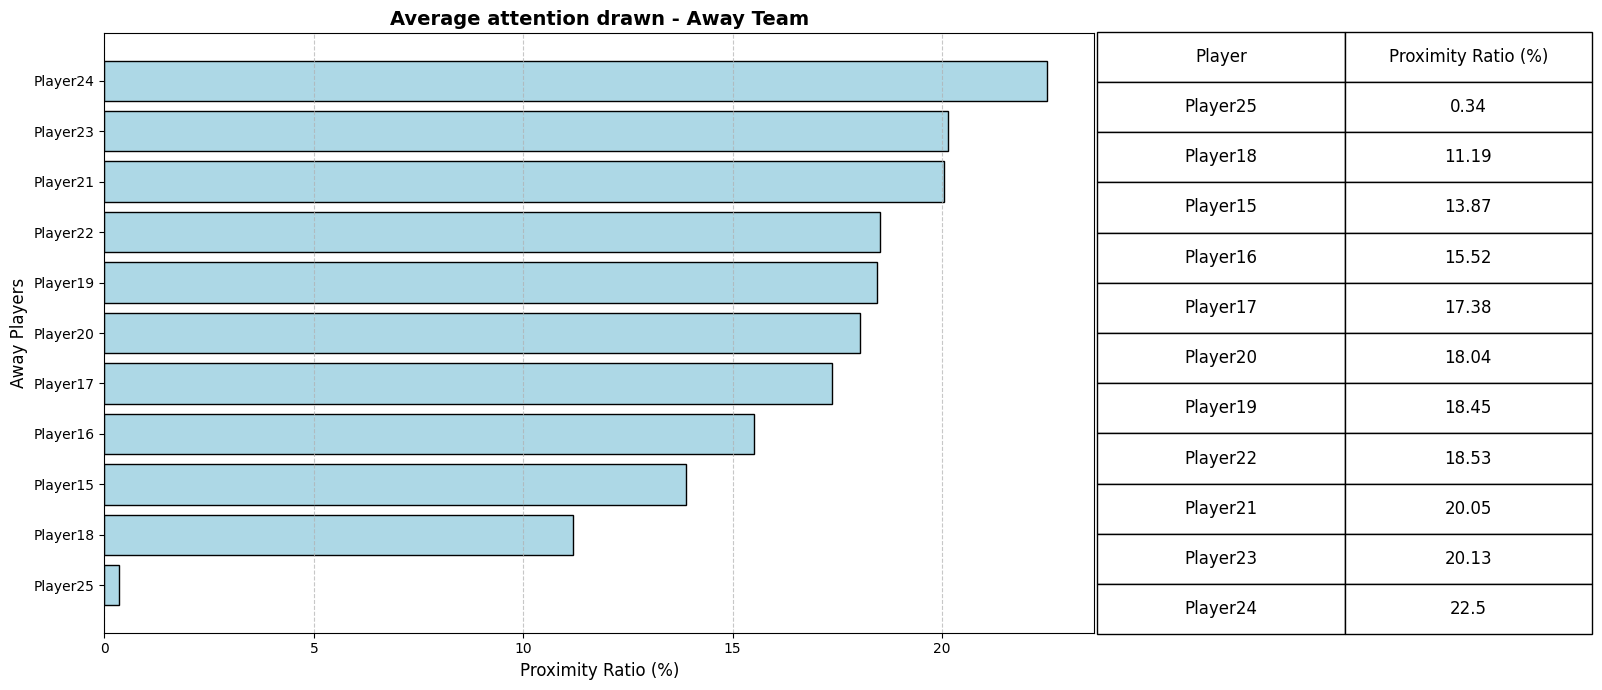

In [86]:
import matplotlib.pyplot as plt

# Sort the results dataframe by 'Proximity Ratio (%)' in ascending order
sorted_df = away_results_df.sort_values('Proximity Ratio (%)', ascending=True)

# Create subplots: one for the bar graph and one for the table
fig, ax = plt.subplots(figsize=(16, 7), ncols=2, gridspec_kw={'width_ratios': [3, 1]})

# Create a horizontal bar graph visualization for Proximity Ratio
ax[0].barh(sorted_df['Player'], sorted_df['Proximity Ratio (%)'], color='lightblue', edgecolor='black')

# Title and labels for the bar graph
ax[0].set_title('Average attention drawn - Away Team', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Away Players', fontsize=12)
ax[0].set_xlabel('Proximity Ratio (%)', fontsize=12)

# Adjust the ticks on y-axis to make them readable
ax[0].tick_params(axis='y', labelsize=10)

# Add gridlines for better readability
ax[0].grid(True, axis='x', linestyle='--', alpha=0.7)

# Create a table next to the bar graph
table_data = sorted_df[['Player', 'Proximity Ratio (%)']].round(2)  # Optional rounding for clarity
table = ax[1].table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')

# Increase the font size and adjust the table's size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 2.71)  # Scale the table size

# Hide the axes for the table subplot
ax[1].axis('off')

# Show the combined plot with tight layout for better spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('bar_and_table_plot_away.png', dpi=300)

# Display the plot
plt.show()


In [89]:
import pandas as pd
import numpy as np

# Load the Excel files
home_excel_file = 'Home.xlsx'  # Replace with your file path
away_excel_file = 'Away.xlsx'  # Replace with your file path

# Load home and away data
df_home = pd.read_excel(home_excel_file)
df_away = pd.read_excel(away_excel_file)

# Clean column names
df_home.columns = df_home.columns.str.strip()
df_away.columns = df_away.columns.str.strip()

# Merge dataframes on the time column to align timestamps
merged_df = pd.merge(df_home, df_away, on='Time [s]', suffixes=('_home', '_away'))

# Scale coordinates by multiplying by 100
for col in merged_df.columns:
    if 'X' in col or 'Y' in col:
        merged_df[col] *= 100

# Extract ball position
ball_x = merged_df['BallX']
ball_y = merged_df['BallY']

# Calculate distances of the ball to all players
home_distances = []
away_distances = []

for i in range(1, 12):  # Player1 to Player11 for home team
    home_distances.append(np.sqrt((merged_df[f'Player{i}X'] - ball_x)**2 + (merged_df[f'Player{i}Y'] - ball_y)**2))

for i in range(15, 26):  # Player15 to Player25 for away team
    away_distances.append(np.sqrt((merged_df[f'Player{i}X'] - ball_x)**2 + (merged_df[f'Player{i}Y'] - ball_y)**2))

# Find the closest home and away players to the ball
min_home_distance = np.min(home_distances, axis=0)
min_away_distance = np.min(away_distances, axis=0)

# Determine possession
merged_df['Possession'] = np.where(min_home_distance < min_away_distance, 'Home', 'Away')

# Filter rows for home and away possession
home_possession_df = merged_df[merged_df['Possession'] == 'Home']
away_possession_df = merged_df[merged_df['Possession'] == 'Away']

# Define team IDs
home_team_ids = list(range(1, 12))  # Player1 to Player11
away_team_ids = list(range(15, 26))  # Player15 to Player25

# Function to calculate normalized proximity per player
def calculate_proximity_normalized(possession_df, team_with_ball_ids, team_without_ball_ids):
    raw_scores = []  # Store raw proximity scores
    results = []  # Store normalized results for all players

    for k in team_with_ball_ids:  # Iterate over players with possession
        player_k_sum = 0  # Initialize the summation for player k
        total_proximity_time_k = 0  # To calculate total Zn(j, k) for normalization

        for j in team_without_ball_ids:  # Iterate over players without possession
            # Extract coordinates for player j and player k
            player_j_x = possession_df[f'Player{j}X']
            player_j_y = possession_df[f'Player{j}Y']
            player_k_x = possession_df[f'Player{k}X']
            player_k_y = possession_df[f'Player{k}Y']

            # Calculate the distance between player j and player k
            distances = np.sqrt((player_k_x - player_j_x)**2 + (player_k_y - player_j_y)**2)

            # Compute Zn(j, k): Time in proximity <= 3 meters
            close_proximity_mask = distances <= 3  # Already in meters after scaling
            time_step = possession_df['Time [s]'].diff().mean()  # Average time step
            Zn_jk = close_proximity_mask.sum() * time_step

            # Accumulate total proximity time for normalization
            total_proximity_time_k += Zn_jk

        # Recompute with normalized values
        for j in team_without_ball_ids:
            # Extract coordinates for player j and player k
            player_j_x = possession_df[f'Player{j}X']
            player_j_y = possession_df[f'Player{j}Y']
            player_k_x = possession_df[f'Player{k}X']
            player_k_y = possession_df[f'Player{k}Y']

            # Calculate the distance between player j and player k
            distances = np.sqrt((player_k_x - player_j_x)**2 + (player_k_y - player_j_y)**2)

            # Compute Zn(j, k): Time in proximity <= 3 meters
            close_proximity_mask = distances <= 3
            time_step = possession_df['Time [s]'].diff().mean()
            Zn_jk = close_proximity_mask.sum() * time_step

            # Normalize Zn(j, k) by total proximity time
            if total_proximity_time_k > 0:
                normalized_Zn_jk = Zn_jk / total_proximity_time_k
            else:
                normalized_Zn_jk = 0

            # Compute the normalized log term
            if normalized_Zn_jk > 0:  # Avoid log(0)
                player_k_sum += normalized_Zn_jk * np.log(normalized_Zn_jk)

        # Store the raw score
        raw_scores.append(player_k_sum)

    # Normalize raw scores to [0, 1]
    min_score = min(raw_scores)
    max_score = max(raw_scores)
    for k, raw_score in enumerate(raw_scores):
        normalized_score = (raw_score - min_score) / (max_score - min_score) if max_score > min_score else 0
        results.append({
            'Player': f'Player{team_with_ball_ids[k]}',
            'Proximity Normalized Score': normalized_score
        })

    return pd.DataFrame(results)

# Calculate for home possession
home_normalized_proximity = calculate_proximity_normalized(
    home_possession_df, team_with_ball_ids=home_team_ids, team_without_ball_ids=away_team_ids
)

# Calculate for away possession
away_normalized_proximity = calculate_proximity_normalized(
    away_possession_df, team_with_ball_ids=away_team_ids, team_without_ball_ids=home_team_ids
)

# Save results to Excel files
home_normalized_proximity.to_excel('Home_Normalized_Proximity_Scores.xlsx', index=False)
away_normalized_proximity.to_excel('Away_Normalized_Proximity_Scores.xlsx', index=False)

print("Results saved:")
print("- Home team: Home_Normalized_Proximity_Scores.xlsx")
print("- Away team: Away_Normalized_Proximity_Scores.xlsx")


Results saved:
- Home team: Home_Normalized_Proximity_Scores.xlsx
- Away team: Away_Normalized_Proximity_Scores.xlsx


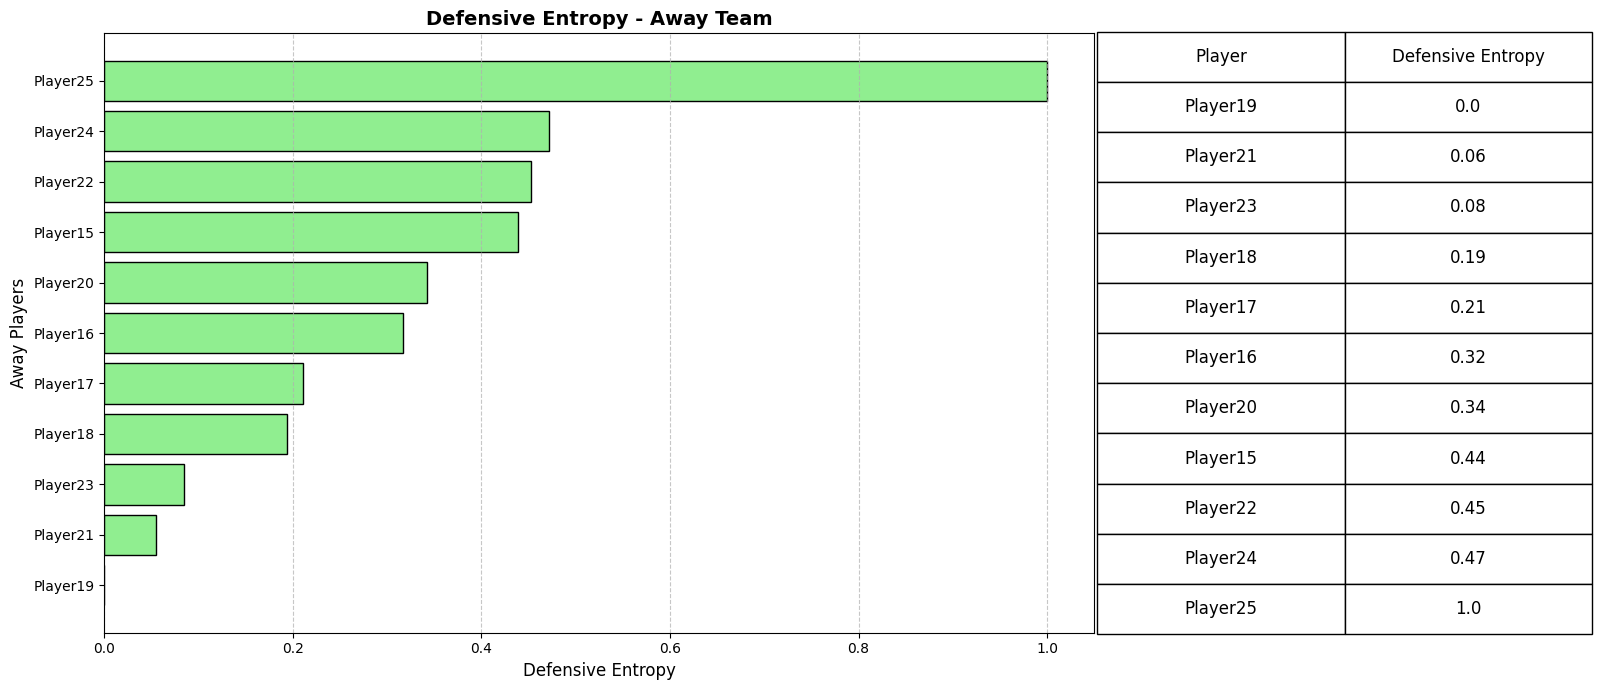

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the normalized proximity scores Excel file
input_excel_file = 'Away_Normalized_Proximity_Scores.xlsx'
results_df = pd.read_excel(input_excel_file)

# Rename the column 'Defensive Entropy' to 'Defensive Entropy Score'
results_df.rename(columns={'Proximity Normalized Score': 'Defensive Entropy'}, inplace=True)

# Sort the results dataframe by 'Defensive Entropy Score' in ascending order
sorted_df = results_df.sort_values('Defensive Entropy', ascending=True)

# Create subplots: one for the bar graph and one for the table
fig, ax = plt.subplots(figsize=(16, 7), ncols=2, gridspec_kw={'width_ratios': [3, 1]})

# Create a horizontal bar graph visualization for Defensive Entropy Score
ax[0].barh(sorted_df['Player'], sorted_df['Defensive Entropy'], color='lightgreen', edgecolor='black')

# Title and labels for the bar graph
ax[0].set_title('Defensive Entropy - Away Team', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Away Players', fontsize=12)
ax[0].set_xlabel('Defensive Entropy', fontsize=12)

# Adjust the ticks on y-axis to make them readable
ax[0].tick_params(axis='y', labelsize=10)

# Add gridlines for better readability
ax[0].grid(True, axis='x', linestyle='--', alpha=0.7)

# Create a table next to the bar graph
table_data = sorted_df[['Player', 'Defensive Entropy']].round(2)  # Optional rounding for clarity
table = ax[1].table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')

# Increase the font size and adjust the table's size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 2.71)  # Scale the table size

# Hide the axes for the table subplot
ax[1].axis('off')

# Show the combined plot with tight layout for better spacing
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('away_defensive_entropy_score_plot.png', dpi=300)

# Display the plot
plt.show()


In [96]:
import pandas as pd

# Load the normalized proximity scores Excel files
home_input_excel_file = 'Home_Normalized_Proximity_Scores.xlsx'
away_input_excel_file = 'Away_Normalized_Proximity_Scores.xlsx'

# Read the data from the Excel files
home_df = pd.read_excel(home_input_excel_file)
away_df = pd.read_excel(away_input_excel_file)

# Calculate the average Defensive Entropy Score for both teams
average_home_defensive_entropy = home_df['Proximity Normalized Score'].mean()
average_away_defensive_entropy = away_df['Proximity Normalized Score'].mean()

# Print the results
print(f"Average Defensive Entropy Score for Home Team: {average_home_defensive_entropy:.2f}")
print(f"Average Defensive Entropy Score for Away Team: {average_away_defensive_entropy:.2f}")


Average Defensive Entropy Score for Home Team: 0.31
Average Defensive Entropy Score for Away Team: 0.32
